# 다중회귀분석(Multivariate Regression)

## 실습용 데이터 설정
* Insurance.csv

In [45]:
!ls -l

total 60
-rw-r--r-- 1 root root 55629 Feb 13 06:27 Insurance.csv
drwxr-xr-x 1 root root  4096 Feb  5 18:37 sample_data


* pandas DataFrame

In [46]:
import pandas as pd

DF = pd.read_csv('Insurance.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# I. 탐색적 데이터 분석

* 시각화 패키지

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

> ## 1) 전체 의료비 분포

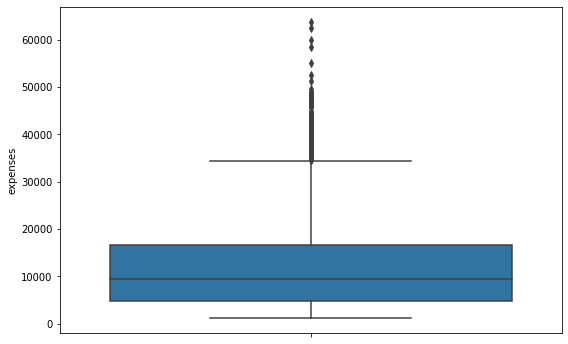

In [49]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'expenses', data = DF, orient = 'v')
plt.show()

> ## 2) 성별 별 의료비 분포

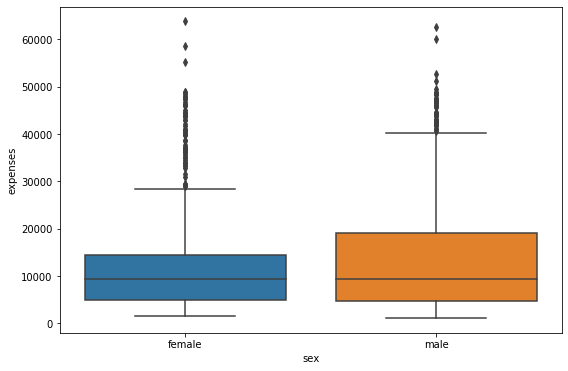

In [50]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

> ## 3) 자녀수 별 의료비 분포

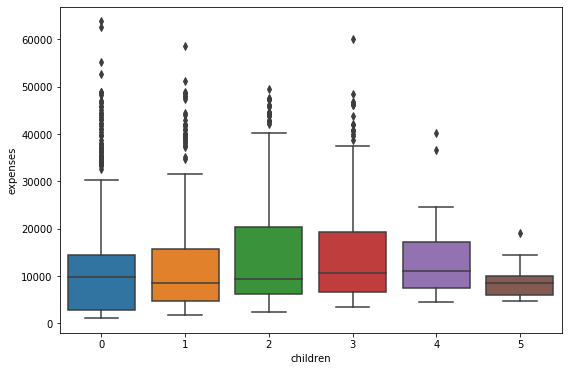

In [51]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'children', y = 'expenses', data = DF)
plt.show()

> ## 4) 흡연여부 별 의료비 분포

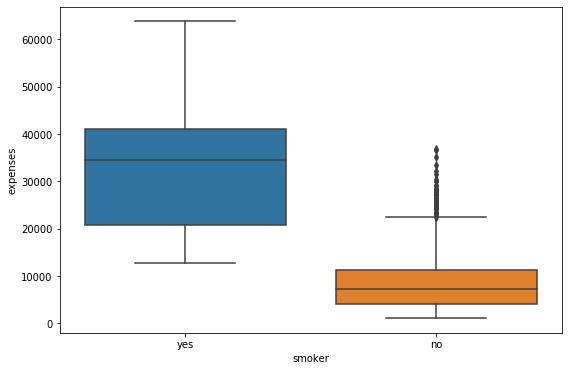

In [52]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'smoker', y = 'expenses', data = DF)
plt.show()

> ## 5) 거주지역 별 의료비 분포

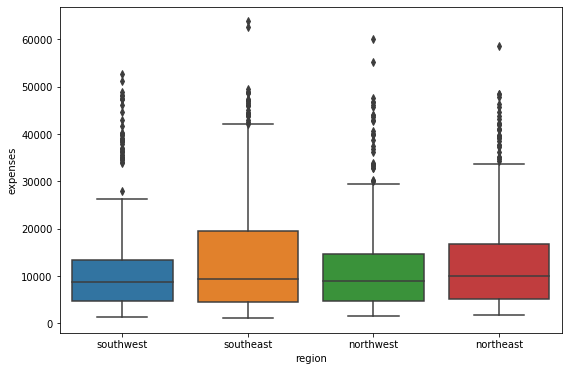

In [53]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'region', y = 'expenses', data = DF)
plt.show()

# II. Data Preprocessing

> ## Train & Test Split
* 7:3

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF,
                                       test_size = 0.3,
                                       random_state = 2045)

# III. Modeling

> ## 1) expenses ~ age + sex + bmi + children + smoker + region

* train_set으로 모델 생성 및 R-Squared 확인

In [55]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'expenses ~ age + sex + bmi + children + smoker + region',
                  data = train_set).fit()

Model_1.rsquared

0.7712335521262552

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex', 'bmi', 'children', 'smoker', 'region']])

* Mean Sqaured Error - sklearn

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse1)

6243.2561939598245

> ## 2) expenses ~ sex + bmi + children + smoker

* train_set으로 모델 생성 및 R-Squared 확인

In [58]:
Model_2 = smf.ols(formula = 'expenses ~ sex + bmi + children + smoker',
                  data = train_set).fit()

Model_2.rsquared

0.6863145462811379

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_2 = Model_2.predict(test_set[['sex', 'bmi', 'children', 'smoker']])

* Mean Sqaured Error - sklearn

In [60]:
mse2 = mean_squared_error(test_set.expenses, y_hat_2)

np.sqrt(mse2)

7198.207810366777

> ## 3) expenses ~ age + bmi + smoker

* train_set으로 모델 생성 및 R-Squared 확인

In [61]:
Model_3 = smf.ols(formula = 'expenses ~ age + bmi + smoker',
                  data = train_set).fit()

Model_3.rsquared

0.7674488770877967

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_3 = Model_3.predict(test_set[['age', 'bmi', 'smoker']])

* Mean Sqaured Error - sklearn

In [63]:
mse3 = mean_squared_error(test_set.expenses, y_hat_3)

np.sqrt(mse3)

6265.41030662869

> ## 4) expenses ~ age + sex + bmi + children + smoker

* train_set으로 모델 생성 및 R-Squared 확인

In [64]:
Model_4 = smf.ols(formula = 'expenses ~ age + sex + bmi + children + smoker',
                  data = train_set).fit()

Model_4.rsquared

0.769934789522072

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_4 = Model_4.predict(test_set[['age', 'sex', 'bmi', 'children', 'smoker']])

* Mean Sqaured Error - sklearn

In [66]:
mse4 = mean_squared_error(test_set.expenses, y_hat_4)

np.sqrt(mse4)

6250.454623021692

> ## 5) expenses ~ age + bmi + children + smoker

* train_set으로 모델 생성 및 R-Squared 확인

In [67]:
Model_5 = smf.ols(formula = 'expenses ~ age + bmi + children + smoker',
                  data = train_set).fit()

Model_5.rsquared

0.7699344407013142

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_5 = Model_5.predict(test_set[['age', 'bmi', 'children', 'smoker']])

* Mean Sqaured Error - sklearn

In [69]:
mse5 = mean_squared_error(test_set.expenses, y_hat_5)

np.sqrt(mse5)

6250.690090991247

> ## 6) expenses ~ age + bmi + children + smoker + region

* train_set으로 모델 생성 및 R-Squared 확인

In [70]:
Model_6 = smf.ols(formula = 'expenses ~ age + bmi + children + smoker + region',
                  data = train_set).fit()

Model_6.rsquared

0.7712328208372139

* test_set으로 y_hat(예측값) 계산

In [0]:
y_hat_6 = Model_6.predict(test_set[['age', 'bmi', 'children', 'smoker', 'region']])

* Mean Sqaured Error - sklearn

In [72]:
mse6 = mean_squared_error(test_set.expenses, y_hat_6)

np.sqrt(mse6)

6243.587296790564

> ## 7) 결과 비교

In [73]:
print(np.sqrt(mse1), '\n',
      np.sqrt(mse2), '\n',
      np.sqrt(mse3), '\n',
      np.sqrt(mse4), '\n',
      np.sqrt(mse5), '\n',
      np.sqrt(mse6))

6243.2561939598245 
 7198.207810366777 
 6265.41030662869 
 6250.454623021692 
 6250.690090991247 
 6243.587296790564


# 
# 
# 
# The End
# 
# 
# 